In [9]:
init_jupyter()
import chdrft.sim.ofoam as ofoam
ctx = app.setup_jup(parser_funcs=[ofoam.args])
import sys
import trimesh
sys.path.append('/usr/share/gmsh/api/python/')
import meshio
from scipy.spatial.transform import Rotation as R
import shutil
import io
import trimesh
import PyFoam

%config Application.log_level='WARN'
import logging
from PyFoam.Infrastructure.Logging import foamLogger
u = foamLogger()
u.level = logging.WARN

Got exception No module named 'unicorn'
Runnign magic qt5
done


failed to import av


False


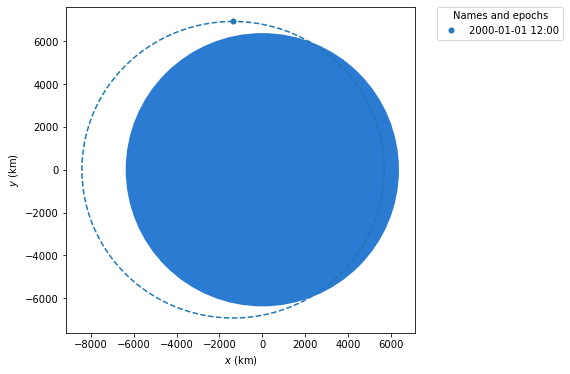

In [35]:
from astropy import units as U
from astropy.time import Time
import poliastro
import poliastro.twobody.orbit as orbit
import poliastro.bodies as bodies
from astropy.coordinates import SkyCoord
from astropy.coordinates import ICRS
from astropy.coordinates.representation import CartesianRepresentation, CartesianDifferential
import datetime

st = np.array( [
  -2.826995221549672,
   6.464447169110216,0,
  -0.007339453328513,
  -0.001620205763181,0,
])*1e3
cr = CartesianRepresentation(st[:3] * U.km, differentials=CartesianDifferential(st[3:] * U.km / U.s))

coords = SkyCoord(cr, frame='gcrs')


o = orbit.Orbit.from_coords(bodies.Earth, coords)

o.plot()

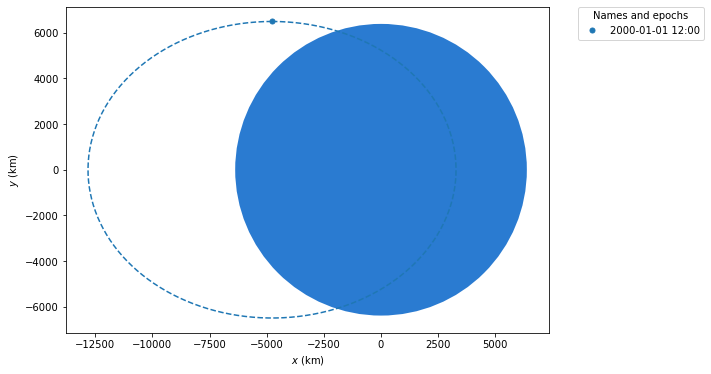

In [2]:
import matlab.engine
eng = matlab.engine.connect_matlab()

In [12]:
eng.eval('pwd')

'/home/benoit/programmation/science/control'

In [4]:
params =eng.rocketDef();


In [18]:
traj = eng.Traj

In [5]:

params = A.RecursiveImport(params)

In [76]:
def to_matlab(x):
    res=None
    if isinstance(x, dict):
        res=dict()
        for k, v in x.items():
            res[k] = to_matlab(v)
    elif isinstance(x, np.ndarray):
        res = to_matlab(x.tolist())
    elif isinstance(x, list):
        res = matlab.double(x)
    elif isinstance(x, int): res = float(x)
    else: res = x
    return res

problem = Z.LazyConf()
problem.bounds.initialTime.low = 0;
problem.bounds.initialTime.upp = 0;
endtime = 7;
problem.bounds.finalTime.low = endtime;
problem.bounds.finalTime.upp = endtime+1;

problem.bounds.state.upp = np.array([[100, 100, 100, 100]]).T
problem.bounds.state.low = np.array([[-100, -100, -100, -100]]).T

problem.bounds.initialState.low = np.array([[-0,-0,-0,-0]]).T
problem.bounds.initialState.upp = np.array([[0,0,0,0]]).T
problem.bounds.finalState.low = np.array([[25,5,0,0]]).T
problem.bounds.finalState.upp = np.array([[25,5,0,0]]).T


problem.bounds.control.low = np.array([[0, params.angle_min_hover]]).T
problem.bounds.control.upp = np.array([[params.thrust, params.angle_max_hover]]).T

problem.guess.time = np.array([0,1])
problem.guess.state = np.array([[0,1],[0,1],[0,1],[0,1]])
problem.guess.control = np.array([[params.thrust/2, params.thrust/2],[0, 0]])

problem.options.method = 'rungeKutta'
problem.options.defaultAccuracy = 'medium'
problem.options.nlpOpt.MaxIter= 200
problem.options.nlpOpt.MaxFunEvals= 20000000

eng.Traj.RunOptim(to_matlab(problem), to_matlab(params), float(endtime))

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running OptimTraj, iteration 1
  -> Transcription via 4th-order Runge-Kutta method 
        nSegments = 20 
        nSubSteps = 2 
Your initial point x0 is not between bounds lb and ub; FMINCON
shifted x0 to strictly satisfy the bounds.

                                            First-order      Norm of
 Iter F-count            f(x)  Feasibility   optimality         step
    0     249    1.862500e+00    2.370e+01    1.515e-01
    1     498    4.215262e+00    2.236e+01    3.933e+00    1.153e+01
    2     747    4.136871e+00    2.226e+01    3.917e+00    2.283e-01
    3     997    4.138662e+00    2.225e+01    3.917e+00    6.173e-02
    4    1246    4.667141e+00    2.213e+01    3.831e+00    2.473e+00
    5    1495    7.184884e+00    2.154e+01    5.571e+00    1.816e+00
    6    1744    8.053919e+00    2.114e+01    6.213e+00    1.077e+00
    7    1993    8.580094e+00    2.083e+01    6.804e+00    1.088e+00
    8    2242    9.235296e

  107   26900    1.207026e+01    1.152e+01    2.169e+00    8.897e+01
  108   27149    1.207127e+01    1.151e+01    2.169e+00    4.161e-01
  109   27398    1.207220e+01    1.151e+01    2.169e+00    9.410e-02
  110   27647    1.237675e+01    1.123e+01    2.177e+00    2.906e+01
  111   27896    1.351005e+01    1.021e+01    2.205e+00    1.006e+02
  112   28145    1.354967e+01    1.019e+01    2.206e+00    2.314e+00
  113   28394    1.472802e+01    9.481e+00    2.237e+00    7.096e+01
  114   28643    1.487771e+01    9.405e+00    2.242e+00    7.493e+00
  115   28892    1.498840e+01    9.360e+00    2.245e+00    5.216e+00
  116   29141    1.499469e+01    9.356e+00    2.245e+00    3.947e-01
  117   29390    1.500066e+01    9.352e+00    2.245e+00    3.925e-01
  118   29639    1.532249e+01    9.142e+00    2.255e+00    2.042e+01
  119   29888    1.590215e+01    8.723e+00    2.425e+00    4.441e+01
  120   30137    1.591589e+01    8.701e+00    2.429e+00    1.563e+00

                                 

{'grid': {'time': matlab.double([[0.0,0.19999971484695986,0.3999994296939197,0.5999991445408795,0.7999988593878394,0.9999985742347993,1.199998289081759,1.3999980039287192,1.5999977187756789,1.7999974336226388,1.9999971484695986,2.1999968633165587,2.399996578163518,2.599996293010478,2.7999960078574384,2.999995722704398,3.1999954375513577,3.3999951523983176,3.5999948672452775,3.799994582092238,3.9999942969391973,4.199994011786157,4.3999937266331175,4.599993441480077,4.799993156327036,4.999992871173997,5.199992586020956,5.3999923008679165,5.599992015714877,5.799991730561836,5.999991445408796,6.199991160255756,6.3999908751027155,6.599990589949675,6.799990304796635,6.999990019643596,7.199989734490555,7.399989449337515,7.599989164184476,7.799988879031434,7.999988593878395]]),
  'state': matlab.double([[0.0,-0.0036162712886612203,0.2652656885397972,0.6301231851832052,0.9819744471180971,1.512326578747647,2.027305877789967,2.3880478626269106,2.926516343648419,3.619058604863693,4.328460222233327

### class Box3D:
    def __init__(self, dim=None, low=None, high=None, center=None):
        if dim is None: dim = high - low
        if center is not None:
            low = center - dim /2
            high = center + dim /2
            
        low = np.zeros((3,)) + low
        high = np.zeros((3,)) + high
        dim = np.zeros((3,)) + dim
        self.v = []
        for i in range(3):
            z = np.zeros((3,3))
            z[i,i] = 1
            self.v.append(z @ dim)
        self.low = low
        self.dim = dim
        self.high = high
        self.center = center
        vx = self.v[0]
        vy = self.v[1]
        vz = self.v[2]
        lowz = low+vz
        self.faces = np.array([
                           [0, 3, 2, 1],
                           [0, 1, 5, 4],
                           [1, 2, 6, 5],
                           [2, 3, 7, 6],
                           [3, 0, 4, 7],
                           [4,5,6,7],
                             ])
        self.vertices=np.array([
            
            low, low+vx, low+vx+vy, low+vy,
            lowz, lowz+vx, lowz+vx+vy, lowz+vy,
        ])
        
        self.n = 8
        self.axis = 'xyz'
        
    @property
    def face_normals(self):
        res = []
        for fl in self.faces:
            vl = self.vertices[fl,:]
            res.append(Z.opa_math.make_norm(np.cross(vl[1]-vl[0], vl[2]-vl[1])))
        return np.array(res)
        
    def get_faces(self):
        res = cmisc.defaultdict(list)
        
        for i, v in enumerate(np.argmax(np.abs(self.face_normals), axis=1)):
            res[(int(v), int(self.face_normals[i, v]))].append(i)
        return res

    def get_ofoam(self, flow_dir=0):
        name_map = A(other=lambda x: 'wall_'+x)
        name_map.xl = 'inlet'
        name_map.xh = 'outlet'
        res = A()
        res.vertices = self.vertices.tolist()
        vids = list(range(self.n))
        res.blocks = ['hex', vids, [50, 25, 50], 'simpleGrading', [1,1,1]]
        res.edges = []
        blist = []
        res.boundary = blist
        
        for (idx,dir), fid in self.get_faces().items():
            name = self.axis[idx]+{1:'h' , -1: 'l'}[dir]
            name=  name_map[name]
            blist.append(name)
            typ = ['wall', 'patch'][flow_dir == idx]
            blist.append(dict(type=typ, faces=self.faces[fid].tolist()))
        
                      
        return res.to_dict()
        

class DragAnalyzer:
    def __init__(self, stl, case):
        self.stl = stl
        self.case = case
        self.parameters = A(v=20, turbulentKE=0.24, turbulentOmega=1.78, bound_mul=5)
        self.run_data = A()
        self.temp_stl= './temp.stl'
        
    def setup_case_for_stl(self, stl_file):
        target_fname = 'target.stl' # fixed by template
        case = self.case
        target_stl_file = Z.os.path.join(case.soldir.constantDir(), 'triSurface', target_fname)
        shutil.copy2(stl_file, target_stl_file)
        m = meshio.Mesh.read(target_stl_file)
        lb= np.min(m.points, axis=0)
        ub= np.max(m.points, axis=0)
        center = (ub+lb)/2
        dim = ub-lb
        self.run_data.area = Z.geo_ops.MultiPoint(m.points[:,1:]).convex_hull.area

        b = Box3D(center = (lb+ub)/2, dim=dim*self.parameters.bound_mul)
        d = b.get_ofoam()
        point_outside_mesh = ub + dim

        d['scale'] = 1
        case.soldir.writeDictionaryContents(case.soldir.systemDir(), 'blockMeshDict', d)

        var_dir = 'include/variables'
        varx = case.soldir.getDictionaryContents(case.soldir.systemDir(), var_dir)
        varx['pointOutsideMesh'] = point_outside_mesh.tolist()
        data = A()
        data.flowVelocity = [self.parameters.v, 0, 0]
        data.pressure            = 0
        data.turbulentKE         = self.parameters.turbulentKE
        data.turbulentOmega      = self.parameters.turbulentOmega
        varx.update(data)


        case.soldir.writeDictionaryContents(case.soldir.systemDir(), var_dir, varx)

        cmisc.failsafe(lambda: Z.shutil.rmtree(case.get_dir('0')))
        Z.shutil.copytree(case.get_dir('0.orig'), case.get_dir('0'))

        
    def apply_rot(self, rot):
        mx = trimesh.load(self.stl)
        mx.apply_transform(Z.MatHelper.mat4(rot.as_matrix()))
        mx.export(self.temp_stl)


    def analyse_rot(self, rot):
        self.apply_rot(rot)

        self.case.clean()
        self.setup_case_for_stl(self.temp_stl)
        self.case.prepare()
        self.case.run('simpleFoam')
        results= self.get_results()
        self.run_data.drag = results['Cd'].values[-1]
        self.run_data.u = self.parameters.v
        self.run_data.drag_coeff = self.run_data.drag *2 /(self.run_data.u ** 2 * self.run_data.area)
        return results
        
    def get_results(self):
        force_file =self.case.get_dir('./postProcessing/forceCoeffs1/0/coefficient.dat')
        content = open(force_file, 'r').read()
        content = content[content.find('# Time')+1:]
        df = pd.read_csv(io.StringIO(content), delim_whitespace=True, index_col=0)
        return df

In [4]:
case = ofoam.Case(ctx, 'test2')
app.global_context.enter_context(case)

In [22]:

ql = [
    #A(stl='box.stl', rot=R.from_euler('yz',[45,45], degrees=True)),
    #A(stl='box.stl', rot=R.from_euler('yz',[45,0], degrees=True)),
    #A(stl='box.stl', rot=R.identity()),
    #A(stl='sphere.stl', rot=R.identity()),
    #A(stl='cone.stl', rot=R.identity()),
    #A(stl='cylinder.stl', rot=R.from_euler('y',[45], degrees=True), name='side on'),
    #A(stl='cylinder.stl', rot=R.identity()),
    #A(stl='cylinder.short.stl', rot=R.identity()),
    #A(stl='/home/benoit/b5.stl', rot=R.from_euler('y', [90], degrees=True)),
    A(stl='/home/benoit/f5_simpl1.stl', rot=R.from_euler('y', [90], degrees=True)),
      
]
vl = np.linspace(40, 60, 1)
for (params, v) in itertools.product(ql, vl):
    da = DragAnalyzer(params.stl, case)
    da.parameters.bound_mul=20 
    da.parameters.v = v
    r1 = da.analyse_rot(params.rot)
    print(da.run_data, v, params)

{'area': 21.574644422300715, 'drag': 9502.825, 'u': 40.0, 'drag_coeff': 0.5505783093102434} 40.0 {'stl': '/home/benoit/f5_simpl1.stl', 'rot': <scipy.spatial.transform.rotation.Rotation object at 0x7fbbb3ab13e0>}


In [11]:
case.clean()

In [15]:
import pygmsh


with pygmsh.occ.Geometry() as geom:
    geom.characteristic_length_max = 0.2
    geom.add_cylinder([-10,0,0], [10,0,0], 1)
    mesh = geom.generate_mesh()
    print(mesh)
    pygmsh.write('cylinder.stl')
    

with pygmsh.occ.Geometry() as geom:
    geom.characteristic_length_max = 0.2
    geom.add_cylinder([-0.5,0,0], [0.5,0,0], 1)
    mesh = geom.generate_mesh()
    print(mesh)
    pygmsh.write('cylinder.short.stl')
    

with pygmsh.occ.Geometry() as geom:
    geom.characteristic_length_max = 0.2
    geom.add_cone([-0.5, 0.0, 0.0], [1.0, 0.0, 0.0], 0.0, 0.5)

    mesh = geom.generate_mesh()
    print(mesh)
    pygmsh.write('cone.stl')
    
with pygmsh.occ.Geometry() as geom:
    geom.characteristic_length_max = 0.2
    geom.add_box([-1,-1,-1], [2,2,2])
    mesh = geom.generate_mesh()
    print(mesh)
    pygmsh.write('box.stl')

with pygmsh.occ.Geometry() as geom:
    geom.characteristic_length_max = 0.5
    geom.add_ellipsoid([0,0,0], [1,1,1])
    mesh = geom.generate_mesh()
    print(mesh)
    pygmsh.write('sphere.stl')

<meshio mesh object>
  Number of points: 4136
  Number of cells:
    line: 114
    triangle: 4162
    tetra: 18898
    vertex: 2
<meshio mesh object>
  Number of points: 362
  Number of cells:
    line: 67
    triangle: 624
    tetra: 1135
    vertex: 2
<meshio mesh object>
  Number of points: 137
  Number of cells:
    line: 26
    triangle: 252
    tetra: 377
    vertex: 2
<meshio mesh object>
  Number of points: 1197
  Number of cells:
    line: 120
    triangle: 1452
    tetra: 4980
    vertex: 8


In [30]:
mx =Mesh(m.vertices.T, m.faces.T, np.array([list(range(len(m.faces)))]).T)
xx = Grid3D(dx = 1.0, dy = 1.0, dz = 1.0,
                        nx = 2, ny = 2, nz = 2)
v1 = CellVariable(mesh=mx)
vw = VTKViewer(vars=(v1,))

vw.plot(filename="face.vtk")


In [31]:
        
def get_faces(dx):
    res = cmisc.defaultdict(list)

    for idx, normal in dx.items():
        v = np.argmax(np.abs(normal), axis=0)
        print(v, normal)
        res[(v, int(round(normal[v])))].append(idx)
    return res

def get_faces_gmsh(obj):
    entries = dict()
    center = get_center(obj.volume.dim, obj.volume._id)
    for s in obj.surface_loop.surfaces:
        face_center = get_center(s.dim, s._id)
        normal = gmsh.model.getNormal(s._id, [0,0])
        print(face_center-center, normal)
        if (np.dot(face_center-center, normal) < 0): normal = -normal
        entries[s] = normal
    return get_faces(entries)
        
def get_face_label(f):
    idx, dir = f
    return 'xyz'[idx]+{1:'h' , -1: 'l'}[dir]

def get_bb(dim, id):
    return np.array(gmsh.model.getBoundingBox(dim, id)).reshape((2, 3))
def get_center(dim, id):
    return np.mean(get_bb(dim,id), axis=0)

In [44]:

with pygmsh.geo.Geometry() as geom:
    b = geom.add_box(*dims)
    geom.characteristic_length_max = 0.01
    gmsh.option.setNumber("Mesh.SubdivisionAlgorithm", 2) # hexahedras

    geom.synchronize()
    print(get_bb(b.volume.dim, b.volume._id))
    print(gmsh.model.mesh.getBarycenters(b.volume._id, -1, True, True))
          
    for fdesc, lst in get_faces_gmsh(b).items():
        print('ADD ', fdesc, lst)
        geom.add_physical(lst, get_face_label(fdesc))
        
    geom.add_physical(b.volume, 'main')
    mesh = geom.generate_mesh()
    gmsh.write('test.msh')

   

[[-21.310 -27.981 -40.505]
 [21.425 27.921 40.415]]
[]
[21.367 0.000 0.000] [-1.000 -0.000 -0.000]
[0.000 27.951 0.000] [0.000 1.000 0.000]
[0.000 0.000 40.460] [-0.000 -0.000 -1.000]
[0.000 0.000 -40.460] [0.000 0.000 -1.000]
[0.000 -27.951 0.000] [-0.000 1.000 0.000]
[-21.367 0.000 0.000] [-1.000 -0.000 -0.000]
0 [1.000 0.000 0.000]
1 [0.000 1.000 0.000]
2 [0.000 0.000 1.000]
2 [0.000 0.000 -1.000]
1 [0.000 -1.000 -0.000]
0 [-1.000 -0.000 -0.000]
ADD  (0, 1) [<pygmsh Surface object, ID 1>]
ADD  (1, 1) [<pygmsh Surface object, ID 2>]
ADD  (2, 1) [<pygmsh Surface object, ID 3>]
ADD  (2, -1) [<pygmsh Surface object, ID 4>]
ADD  (1, -1) [<pygmsh Surface object, ID 5>]
ADD  (0, -1) [<pygmsh Surface object, ID 6>]


In [ ]:
mesh_in =pymesh.load_mesh('./test2/constant/triSurface/')
def transform_mesh(mesh, func=None, mat=None):
    if func is None: func = lambda x: Z.opa_math.MatHelper.mat_apply_nd(mat, x, n=3)
    return pymesh.Mesh(tsf(mesh.points), mesh.faces)

mout = transform_mesh(mesh_in)
pymesh.save_mesh('./test2/constant/triSurface/', rmesh)

In [8]:
        
def get_faces(dx):
    res = cmisc.defaultdict(list)

    for idx, normal in dx.items():
        v = np.argmax(np.abs(normal), axis=0)
        print(v, normal)
        res[(v, int(round(normal[v])))].append(idx)
    return res

def get_faces_gmsh(obj):
    entries = dict()
    center = get_center(obj.volume.dim, obj.volume._id)
    for s in obj.surface_loop.surfaces:
        face_center = get_center(s.dim, s._id)
        normal = gmsh.model.getNormal(s._id, [0,0])
        print(face_center-center, normal)
        if (np.dot(face_center-center, normal) < 0): normal = -normal
        entries[s] = normal
    return get_faces(entries)
        
def get_face_label(f):
    idx, dir = f
    return 'xyz'[idx]+{1:'h' , -1: 'l'}[dir]

def get_bb(dim, id):
    return np.array(gmsh.model.getBoundingBox(dim, id)).reshape((2, 3))
def get_center(dim, id):
    return np.mean(get_bb(dim,id), axis=0)

with pygmsh.geo.Geometry() as geom:
    b = geom.add_box(-1, 1, -1, 1, -1, 1)
    geom.characteristic_length_max = 0.1
    gmsh.option.setNumber("Mesh.SubdivisionAlgorithm", 2) # hexahedras

    geom.synchronize()
    print(get_bb(b.volume.dim, b.volume._id))
    print(gmsh.model.mesh.getBarycenters(b.volume._id, -1, True, True))
          
    for fdesc, lst in get_faces_gmsh(b).items():
        print('ADD ', fdesc, lst)
        geom.add_physical(lst, get_face_label(fdesc))
        
    geom.add_physical(b.volume, 'main')
    mesh = geom.generate_mesh()
    gmsh.write('test.msh')

    
with pygmsh.occ.Geometry() as geom:
    geom.characteristic_length_max = 2.5
    geom.add_cylinder([-10,0,0], [20,0,0], 3)
    mesh = geom.generate_mesh()
    print(mesh)
    gmsh.write('cylinder.msh')
    
with pygmsh.occ.Geometry() as geom:
    geom.characteristic_length_max = 2.1
    gmsh.merge('./test2/constant/triSurface/target.stl')
    gmsh.merge('cylinder.msh')
    mesh = geom.generate_mesh()
    print(mesh)
    gmsh.write('merge.msh')
    
    
#m1 = fipy.meshes.Gmsh3D('./test.msh2')

[[-1.000 -1.000 -1.000]
 [1.000 1.000 1.000]]
[]
[1.000 0.000 0.000] [-1.000 -0.000 -0.000]
[0.000 1.000 0.000] [0.000 1.000 0.000]
[0.000 0.000 1.000] [-0.000 -0.000 -1.000]
[0.000 0.000 -1.000] [-0.000 -0.000 -1.000]
[0.000 -1.000 0.000] [0.000 1.000 0.000]
[-1.000 0.000 0.000] [-1.000 -0.000 -0.000]
0 [1.000 0.000 0.000]
1 [0.000 1.000 0.000]
2 [0.000 0.000 1.000]
2 [-0.000 -0.000 -1.000]
1 [-0.000 -1.000 -0.000]
0 [-1.000 -0.000 -0.000]
ADD  (0, 1) [<pygmsh Surface object, ID 1>]
ADD  (1, 1) [<pygmsh Surface object, ID 2>]
ADD  (2, 1) [<pygmsh Surface object, ID 3>]
ADD  (2, -1) [<pygmsh Surface object, ID 4>]
ADD  (1, -1) [<pygmsh Surface object, ID 5>]
ADD  (0, -1) [<pygmsh Surface object, ID 6>]
<meshio mesh object>
  Number of points: 139
  Number of cells:
    line: 28
    triangle: 258
    tetra: 341
    vertex: 2
Info    : Reading './test2/constant/triSurface/target.stl'...
Info    : 168 facets in solid 0 target
Info    : Done reading './test2/constant/triSurface/target.stl'

In [140]:
vertices =np.array([
    [0.0, .0, 0],
    [1.0, 0.0, 0],
    [1.0, 1.0, 0],
    [0.0, 1.0, 0],
    ]) + [0.5,0.5,0];
tri = pymesh.triangle();
tri.points = vertices;
tri.max_area = 0.05;
tri.split_boundary = False;
tri.verbosity = 0;
tri.run(); # Execute triangle.
mesh = tri.mesh; # output triangulation.

In [1]:
#import gmsh
import fipy
import pymeshi
#import pygmsh
from fipy import *
from fipy.meshes import Grid3D
from fipy.meshes.mesh import Mesh
%load_ext autoreload
%autoreload 2

ModuleNotFoundError: No module named 'fipy'